# Likelihood curves vs parameters


This notebook explores how the likelihood returned by the Kalman filter varies with respect to the choice of model parameters 


---

### Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import json 
import pandas as pd 
try:
    sys.path.remove("../py_src") # Hacky way to add higher directory to python modules path. 
except:
    pass
sys.path.append("../py_src") # Means that I dont have to make src/ a proper python package

### Define some functions 

Now to start, lets make a function that creates some synthetic data for a particular strain, measurement noise and noise seed AND a function that gets a likelihood value given that data 

In [3]:
from system_parameters import SystemParameters
from pulsars import Pulsars
from synthetic_data import SyntheticData
from model import LinearModel
from kalman_filter import KalmanFilter
from priors import priors_dict,bilby_priors_dict
import numpy as np 



#Function to create synthetic data
def create_synthetic_data(h,σp,measurement_noise,seed):

    P    = SystemParameters(h=h,σp=σp,σm=measurement_noise,seed=seed,Npsr=20,cadence=0.5)       #define the system parameters as a class
    PTA  = Pulsars(P)               # setup the PTA
    data = SyntheticData(PTA,P)     # generate some synthetic data

    return P,PTA,data

#Fit model to data and return likelihood
def get_likelihood(data,parameter_name,parameter_value,P,PTA,measurement_model):

    _P = copy.copy(P)
    _PTA = copy.copy(PTA)
    _P.measurement_model = measurement_model
    

    #Define the model 
    model = LinearModel(_P)

    #Initialise the Kalman filter
    KF = KalmanFilter(model,data.f_measured,_PTA)

    #Get the
    guessed_parameters = priors_dict(_PTA,_P) #These are the true parameters 
    guessed_parameters[parameter_name] = np.array([parameter_value])

    
    model_likelihood,model_x_predictions,model_y_predictions = KF.likelihood_with_results(guessed_parameters)

    return model_likelihood,model_x_predictions,model_y_predictions


 

### $\sigma_p = None$

The process noise matrices are:
[9.76932769e-30 3.86393778e-30 9.24013771e-30 2.69075500e-30
 3.25906088e-30 1.26910321e-30 2.49348630e-30 3.25348589e-30
 9.64438453e-30 2.71013306e-30 4.46596061e-30 6.13772101e-30
 8.64985084e-30 8.65120094e-30 6.78132500e-30 6.63275604e-30
 7.38400121e-30 2.30526122e-30 1.80345523e-30 8.71710823e-30]
Number of paramters =  200


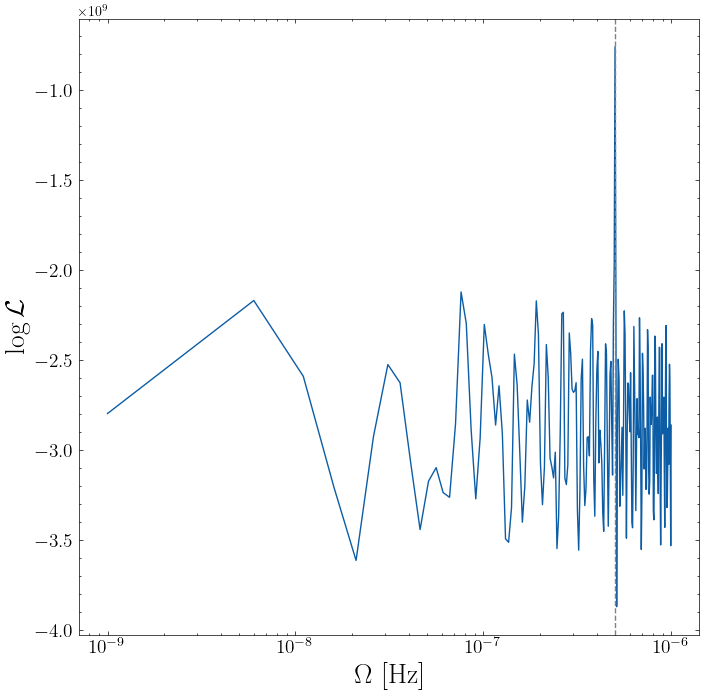

In [19]:
from plotting import plot_likelihood


#Create some data
h = 1e-12
measurement_noise = 1e-12
σp = None
seed=1236
P,PTA,data = create_synthetic_data(h,σp,measurement_noise,seed)




#Iterate over the likelihood

import copy 
import logging 
logger = logging.getLogger().setLevel(logging.ERROR)
from plotting import plot_all

#set the measurement model
measurement_model = 'pulsar' #Set the measurement model 
parameter_name = "omega_gw"
N = 100
parameter_range = np.logspace(-9,-6,N)
parameter_range = np.arange(1e-9,1e-6,5e-9)
print("Number of paramters = ", len(parameter_range))
#parameter_range = [1e-9,5e-9,1e-8,5e-8,1e-7,5e-7,1e-6]
#parameter_range=[5e-7]
likelihood_curves_earth_omega = np.zeros(len(parameter_range))             


for i,p in enumerate(parameter_range):
    p = parameter_range[i]
    #print("Omega = ", p)
    ll,xpred,ypred = get_likelihood(data,parameter_name,p,P,PTA,measurement_model)
    likelihood_curves_earth_omega[i] =ll
    #plot_all(PTA.t, data.intrinsic_frequency, data.f_measured,data.f_measured_clean,xpred,ypred, 0,savefig=None)



#Plot it 
plot_likelihood(parameter_range,likelihood_curves_earth_omega,r"$\Omega$ [Hz]",log_x_axes=True,injection=5e-7)



### $\sigma_p = 10^{-15}$

The process noise matrices are:
[1.e-15 1.e-15 1.e-15 1.e-15 1.e-15 1.e-15 1.e-15 1.e-15 1.e-15 1.e-15
 1.e-15 1.e-15 1.e-15 1.e-15 1.e-15 1.e-15 1.e-15 1.e-15 1.e-15 1.e-15]
Number of paramters =  200


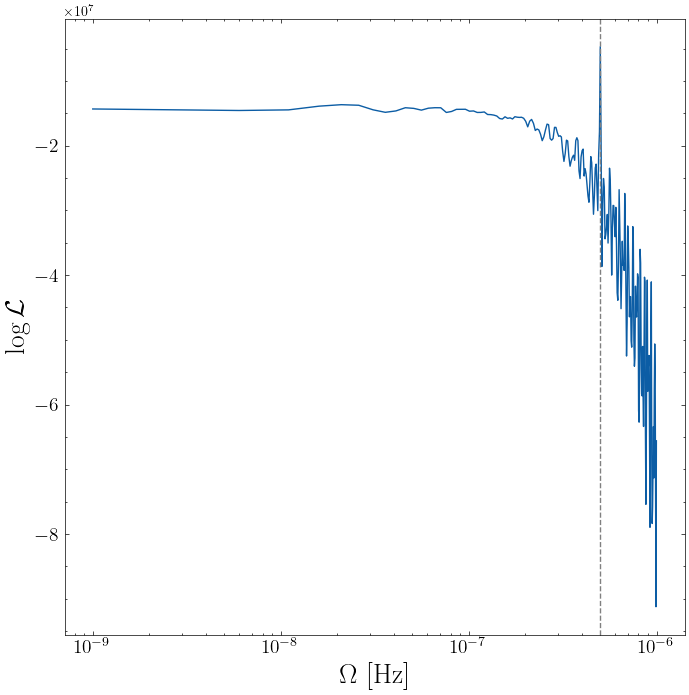

In [22]:
from plotting import plot_likelihood


#Create some data
h = 1e-12
measurement_noise = 1e-12
σp = 1e-15
seed=1236
P,PTA,data = create_synthetic_data(h,σp,measurement_noise,seed)




#Iterate over the likelihood

import copy 
import logging 
logger = logging.getLogger().setLevel(logging.ERROR)
from plotting import plot_all

#set the measurement model
measurement_model = 'pulsar' #Set the measurement model 
parameter_name = "omega_gw"
N = 100
parameter_range = np.logspace(-9,-6,N)
parameter_range = np.arange(1e-9,1e-6,5e-9)
print("Number of paramters = ", len(parameter_range))
#parameter_range = [1e-9,5e-9,1e-8,5e-8,1e-7,5e-7,1e-6]
#parameter_range=[5e-7]
likelihood_curves_earth_omega = np.zeros(len(parameter_range))             


for i,p in enumerate(parameter_range):
    p = parameter_range[i]
    #print("Omega = ", p)
    ll,xpred,ypred = get_likelihood(data,parameter_name,p,P,PTA,measurement_model)
    likelihood_curves_earth_omega[i] =ll
    #plot_all(PTA.t, data.intrinsic_frequency, data.f_measured,data.f_measured_clean,xpred,ypred, 0,savefig=None)



#Plot it 
plot_likelihood(parameter_range,likelihood_curves_earth_omega,r"$\Omega$ [Hz]",log_x_axes=True,injection=5e-7)



# What about delta?

The process noise matrices are:
[9.76932769e-20 3.86393778e-20 9.24013771e-20 2.69075500e-20
 3.25906088e-20 1.26910321e-20 2.49348630e-20 3.25348589e-20
 9.64438453e-20 2.71013306e-20 4.46596061e-20 6.13772101e-20
 8.64985084e-20 8.65120094e-20 6.78132500e-20 6.63275604e-20
 7.38400121e-20 2.30526122e-20 1.80345523e-20 8.71710823e-20]
Number of paramters =  200


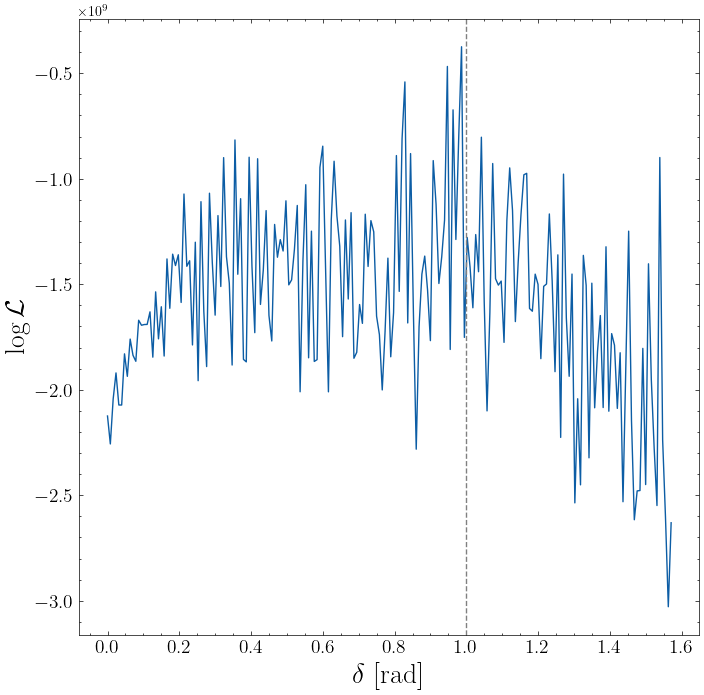

In [7]:
from plotting import plot_likelihood


#Create some data
h = 1e-12
measurement_noise = 1e-11
σp = None
seed=1236
P,PTA,data = create_synthetic_data(h,σp,measurement_noise,seed)




#Iterate over the likelihood

import copy 
import logging 
logger = logging.getLogger().setLevel(logging.ERROR)
from plotting import plot_all

#set the measurement model
measurement_model = 'pulsar' #Set the measurement model 
parameter_name = "delta_gw"
N = 200
parameter_range = np.linspace(0.0,np.pi/2.0,N)

print("Number of paramters = ", len(parameter_range))

likelihood_curves_earth_omega = np.zeros(len(parameter_range))             


for i,p in enumerate(parameter_range):
    p = parameter_range[i]
    #print("Omega = ", p)
    ll,xpred,ypred = get_likelihood(data,parameter_name,p,P,PTA,measurement_model)
    likelihood_curves_earth_omega[i] =ll
    #plot_all(PTA.t, data.intrinsic_frequency, data.f_measured,data.f_measured_clean,xpred,ypred, 0,savefig=None)



#Plot it 
plot_likelihood(parameter_range,likelihood_curves_earth_omega,r"$\delta$ [rad]",log_x_axes=False,injection=1.0)



The process noise matrices are:
[1.e-15 1.e-15 1.e-15 1.e-15 1.e-15 1.e-15 1.e-15 1.e-15 1.e-15 1.e-15
 1.e-15 1.e-15 1.e-15 1.e-15 1.e-15 1.e-15 1.e-15 1.e-15 1.e-15 1.e-15]
Number of paramters =  200


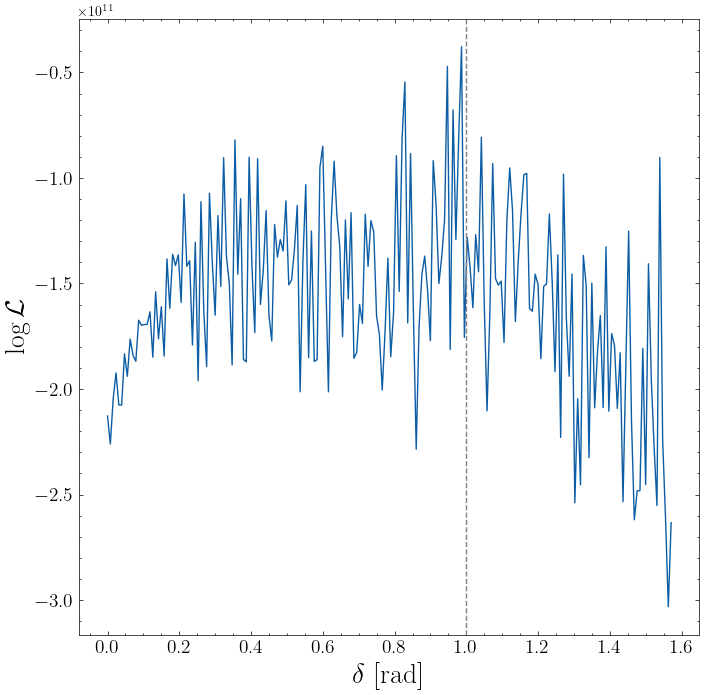

In [10]:
from plotting import plot_likelihood


#Create some data
h = 1e-8
measurement_noise = 1e-9
σp = 1e-15
seed=1236
P,PTA,data = create_synthetic_data(h,σp,measurement_noise,seed)




#Iterate over the likelihood

import copy 
import logging 
logger = logging.getLogger().setLevel(logging.ERROR)
from plotting import plot_all

#set the measurement model
measurement_model = 'pulsar' #Set the measurement model 
parameter_name = "delta_gw"
N = 200
parameter_range = np.linspace(0.0,np.pi/2.0,N)

print("Number of paramters = ", len(parameter_range))

likelihood_curves_earth_omega = np.zeros(len(parameter_range))             


for i,p in enumerate(parameter_range):
    p = parameter_range[i]
    #print("Omega = ", p)
    ll,xpred,ypred = get_likelihood(data,parameter_name,p,P,PTA,measurement_model)
    likelihood_curves_earth_omega[i] =ll
    #plot_all(PTA.t, data.intrinsic_frequency, data.f_measured,data.f_measured_clean,xpred,ypred, 0,savefig=None)



#Plot it 
plot_likelihood(parameter_range,likelihood_curves_earth_omega,r"$\delta$ [rad]",log_x_axes=False,injection=1.0)

